In [2]:
%load_ext autoreload
%autoreload 1
%aimport helpers, loaders, plotters 

In [3]:
from pprint import pprint
from math import ceil, floor
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from helpers import balanced_accuracy_scorer, balanced_accuracy, load_best_result, save_search_result, scikit_cv_result_to_df
from loaders import load_adult, load_mnist
from plotters import plot_means_w_stds, gen_and_plot_learning_curve, plot_learning_curve, gen_and_plot_validation_curve, plot_validation_curve

# Load and Preprocess Data

In [4]:
dataset = 'adult'
learner_type = 'DT'
loader_func = load_adult

In [5]:
df = loader_func(preprocess=True)

Dataset shape (30162, 105)
Value composition:
0    0.751078
1    0.248922
Name: target, dtype: float64


### Split data into training and testing

In [6]:
X = df[[c for c in df.columns if c != 'target']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Skip Scaling for decision trees - it won't make a difference

# Decision Tree Model Complexity

In [7]:
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier()

base_clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [46]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,21),
}

In [47]:
grid_search = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring=balanced_accuracy_scorer,
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [48]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 38 candidates, totalling 152 fits
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=2, score=0.702968132498786, total=   0.1s
[CV]  criterion=gini, max_depth=2, score=0.6951094861362613, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=2, score=0.7010526243036646, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=2, score=0.6935536264738813, total=   0.1s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, score=0.7321418768869924, total=   0

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1424s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=4, score=0.7348077067030581, total=   0.1s
[CV] criterion=gini, max_depth=4 .....................................
[CV]  criterion=gini, max_depth=4, score=0.7375844165219088, total=   0.1s
[CV]  criterion=gini, max_depth=5, score=0.7435574020011477, total=   0.1s
[CV] criterion=gini, max_depth=5 .....................................
[CV] criterion=gini, max_depth=4 .....................................
[CV]  criterion=gini, max_depth=5, score=0.7387175216215345, total=   0.1s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=4, score=0.7269468212389435, total=   0.1s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.7265620800292434, total=   0.1s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.7479887480

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s


[CV]  criterion=gini, max_depth=7, score=0.7721233875042813, total=   0.2s
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=6, score=0.7426805096707506, total=   0.1s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=6, score=0.7437756014173221, total=   0.1s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=7, score=0.7445640905132493, total=   0.2s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=8, score=0.750154510260057, total=   0.2s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=7, score=0.7455562774252903, total=   0.2s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=8, score=0.7709733875810759, total=   0.2s
[CV] criterion=gini, max_depth=8 .................

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s


[CV]  criterion=gini, max_depth=10, score=0.7556365534807035, total=   0.2s
[CV] criterion=gini, max_depth=10 ....................................
[CV]  criterion=gini, max_depth=9, score=0.7585276622018255, total=   0.2s
[CV]  criterion=gini, max_depth=10, score=0.7605711679084362, total=   0.2s
[CV] criterion=gini, max_depth=11 ....................................
[CV] criterion=gini, max_depth=10 ....................................
[CV]  criterion=gini, max_depth=11, score=0.7551409690192533, total=   0.2s
[CV] criterion=gini, max_depth=11 ....................................
[CV]  criterion=gini, max_depth=10, score=0.7571655170507168, total=   0.2s
[CV] criterion=gini, max_depth=12 ....................................
[CV]  criterion=gini, max_depth=10, score=0.754974757597679, total=   0.2s
[CV] criterion=gini, max_depth=12 ....................................
[CV]  criterion=gini, max_depth=11, score=0.7713750236143556, total=   0.2s
[CV] criterion=gini, max_depth=11 ..........

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s


[CV]  criterion=gini, max_depth=12, score=0.7637667853911997, total=   0.2s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.7697416013528147, total=   0.3s
[CV] criterion=gini, max_depth=13 ....................................
[CV]  criterion=gini, max_depth=13, score=0.7523787143653614, total=   0.3s
[CV] criterion=gini, max_depth=15 ....................................
[CV]  criterion=gini, max_depth=14, score=0.7784717303805558, total=   0.3s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=14, score=0.785198253075242, total=   0.3s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.7679693727566362, total=   0.2s
[CV]  criterion=gini, max_depth=15, score=0.7668991998095972, total=   0.2s
[CV] criterion=gini, max_depth=15 ....................................
[CV] criterion=gini, max_depth=15 .........

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s


[CV]  criterion=gini, max_depth=18, score=0.7467406012656405, total=   0.3s
[CV] criterion=gini, max_depth=18 ....................................
[CV]  criterion=gini, max_depth=18, score=0.7783552735655911, total=   0.3s
[CV]  criterion=gini, max_depth=19, score=0.7470369538638122, total=   0.2s
[CV] criterion=gini, max_depth=18 ....................................
[CV] criterion=gini, max_depth=19 ....................................
[CV]  criterion=gini, max_depth=17, score=0.7592470361103816, total=   0.2s
[CV] criterion=gini, max_depth=19 ....................................
[CV]  criterion=gini, max_depth=18, score=0.7623672028469313, total=   0.2s
[CV] criterion=gini, max_depth=20 ....................................
[CV]  criterion=gini, max_depth=19, score=0.7485445493459398, total=   0.2s
[CV] criterion=gini, max_depth=20 ....................................
[CV]  criterion=gini, max_depth=18, score=0.7573528960031455, total=   0.2s
[CV] criterion=entropy, max_depth=2 ......

[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.2s


[CV] criterion=entropy, max_depth=5 ..................................
[CV] criterion=entropy, max_depth=5 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.7317613593831873, total=   0.1s
[CV] criterion=entropy, max_depth=4 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.7366951344443984, total=   0.1s
[CV] criterion=entropy, max_depth=4 ..................................
[CV]  criterion=entropy, max_depth=5, score=0.7408893648956527, total=   0.1s
[CV] criterion=entropy, max_depth=5 ..................................
[CV]  criterion=entropy, max_depth=5, score=0.7331253350166722, total=   0.1s
[CV] criterion=entropy, max_depth=5 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.7273273387427487, total=   0.1s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.7234883740575376, total=   0.1s
[CV]  criterion=entropy, max_depth=

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.0s


[CV] criterion=entropy, max_depth=9 ..................................
[CV]  criterion=entropy, max_depth=9, score=0.7608192146364464, total=   0.2s
[CV] criterion=entropy, max_depth=9 ..................................
[CV]  criterion=entropy, max_depth=8, score=0.7621185801590263, total=   0.2s
[CV] criterion=entropy, max_depth=10 .................................
[CV]  criterion=entropy, max_depth=8, score=0.7441561189211273, total=   0.1s
[CV] criterion=entropy, max_depth=10 .................................
[CV]  criterion=entropy, max_depth=9, score=0.7589419693527901, total=   0.2s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=9, score=0.7773857410760775, total=   0.2s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=10, score=0.7522141032358863, total=   0.2s
[CV] criterion=entropy, max_depth=10 .................................
[CV]  criterion=entropy, max_depth

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.2s


[CV] criterion=entropy, max_depth=15 .................................
[CV]  criterion=entropy, max_depth=14, score=0.7627788221850536, total=   0.2s
[CV] criterion=entropy, max_depth=14 .................................
[CV]  criterion=entropy, max_depth=14, score=0.75837080926908, total=   0.2s
[CV] criterion=entropy, max_depth=14 .................................
[CV]  criterion=entropy, max_depth=15, score=0.759032228345051, total=   0.2s
[CV] criterion=entropy, max_depth=15 .................................
[CV]  criterion=entropy, max_depth=15, score=0.7726997313723051, total=   0.2s
[CV] criterion=entropy, max_depth=15 .................................
[CV]  criterion=entropy, max_depth=14, score=0.7617570693317484, total=   0.2s
[CV] criterion=entropy, max_depth=16 .................................
[CV]  criterion=entropy, max_depth=14, score=0.7678770271868429, total=   0.2s
[CV] criterion=entropy, max_depth=16 .................................
[CV]  criterion=entropy, max_dep

[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:    8.2s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 21)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(balanced_accuracy), verbose=10)

In [49]:
save_search_result(grid_search, dataset, learner_type)

### Analysis

In [50]:
res = grid_search.cv_results_
res_df = scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  \
criterion max_depth                                                 
gini      14              0.237286      0.031942         0.005269   
entropy   13              0.192258      0.006156         0.004546   
gini      16              0.234767      0.007851         0.004748   
          15              0.210028      0.003607         0.006003   
entropy   10              0.164905      0.005902         0.005369   
          9               0.164820      0.005300         0.004464   
          15              0.222459      0.012567         0.005629   
gini      11              0.207702      0.012589         0.004977   
          13              0.262978      0.032987         0.007036   
entropy   14              0.220640      0.015648         0.009628   

                     std_score_time  mean_test_score  std_test_score  \
criterion max_depth                                                    
gini      14               0.000409         0.777237        0.005185   
entropy   13               0.000425         0.770188        0.001183   
gini      16               0.000187         0.768801        0.010555   
          15               0.001123         0.768373        0.002210   
entropy   10               0.000892         0.766097        0.011716   
          9                0.000171         0.765892        0.007184   
          15               0.000697         0.764617        0.005292   
gini      11               0.000832         0.764276        0.006030   
          13               0.001786         0.764118        0.006881   
entropy   14               0.007473         0.762696        0.003407   

                     rank_test_score  mean_train_score  std_train_score  
criterion max_depth                                                      
gini      14                       1          0.859013         0.007275  
entropy   13                       2          0.823521         0.007277  
gini      16                       3          0.880099         0.005834  
          15                       4          0.864352         0.004876  
entropy   10                       5          0.793259         0.013165  
          9                        6          0.783312         0.010259  
          15                       7          0.842572         0.003730  
gini      11                       8          0.803799         0.006288  
          13                       9          0.830680         0.007665  
entropy   14                      10          0.828102         0.007040

In [51]:
gini = res_df.xs('gini', level='criterion')
entropy = res_df.xs('entropy', level='criterion')

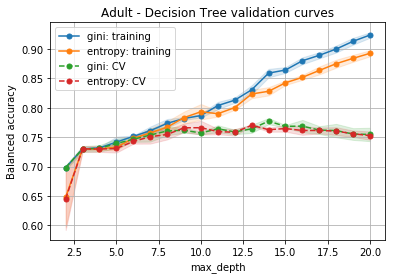

In [53]:
plot_means_w_stds(
    means=(gini['mean_train_score'], entropy['mean_train_score'], gini['mean_test_score'], entropy['mean_test_score']),
    stds=(gini['std_train_score'], entropy['std_train_score'], gini['std_test_score'], entropy['std_test_score']),
    xrange=param_grid['max_depth'],
    xlabel='max_depth',
    ylabel='Balanced accuracy',
    series_labels=('gini: training', 'entropy: training', 'gini: CV', 'entropy: CV'),
    title='Adult - Decision Tree validation curves',
    ylim=None,
    markersize=None
)

In [54]:
gini_fit_mean, ig_fit_mean = np.split(res['mean_fit_time'], 2)
gini_fit_std, ig_fit_std = np.split(res['std_fit_time'], 2)

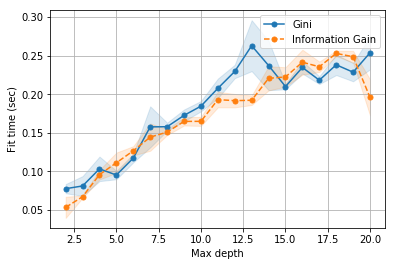

In [55]:
plot_means_w_stds(
    means=(gini_fit_mean, ig_fit_mean),
    stds=(gini_fit_std, ig_fit_std),
    xrange=param_grid['max_depth'],
    series_labels=('Gini', 'Information Gain'),
    ylabel='Fit time (sec)',
    xlabel='Max depth',
)

## Learning curve analysis

### What's the best estimator?

In [56]:
best_params = res['params'][np.argmax(res['mean_test_score'])]
pprint(best_params)

print(np.max(res['mean_test_score']))

{'criterion': 'gini', 'max_depth': 14}
0.777237470098


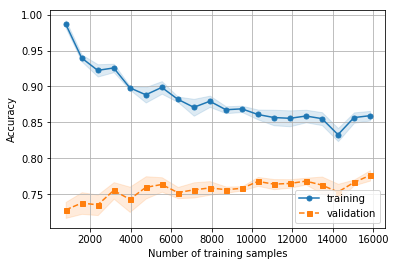

In [57]:
clf = DecisionTreeClassifier(**best_params)
train_sizes, _, _, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(clf, X_train, y_train, ylim=None, cv=4, train_sizes=np.linspace(.05, 1.0, 20), scoring=balanced_accuracy_scorer)

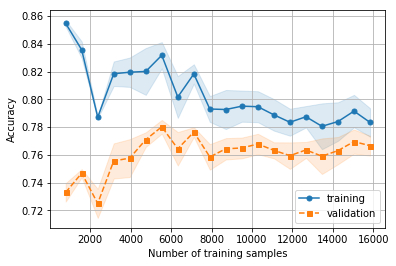

In [58]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=9)
train_sizes2, _, _, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(clf2, X_train, y_train, ylim=None, cv=4, train_sizes=np.linspace(.05, 1.0, 20), scoring=balanced_accuracy_scorer)

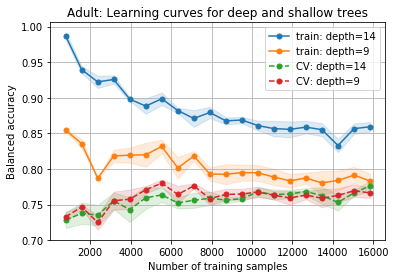

In [60]:
plot_means_w_stds(
    (train_mean, train_mean2, test_mean, test_mean2),
    (train_std, train_std2, test_std, test_std2),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='Balanced accuracy',
    series_labels=['train: depth=14', 'train: depth=9', 'CV: depth=14', 'CV: depth=9'],
    title='Adult: Learning curves for deep and shallow trees'
)

# Performance on Test Set

In [13]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=1)

best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)
test_score = balanced_accuracy(y_test, y_test_pred)
print('%.4f' % test_score)

0.7669
